In [29]:
"""
Import librarys
"""
import numpy as np 
import matplotlib.pyplot as plt
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression



<h2>Genera x y y </h2>

In [40]:
n = 30
# x_train = np.random.rand(n) * 10 
# y_train = np.random.rand(n) * 1000

# np.random.seed(0)
# x_train = 2 * np.random.rand(n, 1)
# y_train = 4 + 3 * x_train + np.random.randn(n, 1)
# x_train = np.array([1.0, 2.0, 3.0,4.0, 5.0, 6.0])
# y_train = np.array([300, 500, 600,660, 800, 900])

# n = 100
# np.random.seed(0)
# x_train = 4 * np.random.rand(n, 1)
# y_train = x_train + np.random.randn(n, 1)
# x_train = x_train.flatten()
# y_train = y_train.flatten()
n_samples = 800
n_features = 1
noise = 10
#Modificar sin Normalizado
x_train, y_train = make_regression(
     n_samples=n_samples, n_features=n_features, noise=noise)

x_train = x_train.flatten()
y_train = y_train.flatten()

print(f"x_train={x_train}")
print(f"y_train={y_train}")



x_train=[ 2.79420330e-01  7.68861879e-02  2.07096968e+00  1.19405188e+00
 -2.32588053e+00 -8.99155120e-01 -1.22250099e+00  1.48628610e+00
  8.31854772e-01 -6.72222038e-01 -1.26517138e+00  1.29551297e+00
 -2.65134760e-01  5.20572324e-01 -7.46487169e-02  2.96722659e-01
  5.74907077e-01 -1.34798234e+00 -9.39671380e-01 -3.16541736e-01
  4.38494089e-01  1.72265835e+00 -9.37374919e-01 -3.35285215e-01
 -1.90433026e-01 -5.52572500e-01 -1.31141143e+00 -1.91257014e+00
 -2.43775991e-01 -3.16023583e-01 -3.25117981e-01 -6.82424869e-01
  1.23126379e+00 -2.34298713e-03 -1.04990631e+00  1.05739796e+00
 -8.13917519e-01 -2.09100068e+00 -2.25432018e+00 -8.07238565e-02
  3.65727697e-01  2.84188967e+00 -1.54366451e-01 -4.74336812e-01
  2.10907217e-01  1.60432288e+00 -2.06512818e-01 -6.19984578e-01
  2.81573551e-02  1.62481750e-01 -1.42901962e-02 -3.72586639e-01
 -1.26638028e+00  5.43898203e-01  6.09368432e-01  2.15450530e+00
  1.09144645e+00  7.43368969e-01  4.99303577e-01  9.73354956e-01
 -1.32120240e+00 

In [147]:
x_train = np.array([1.0, 2.0, 3.0])
y_train = np.array([300, 500, 600])
print(f"x_train={x_train}")
print(f"y_train={y_train}")

x_train=[1. 2. 3.]
y_train=[300 500 600]


<h2>Model Implementation</h2>

In [4]:

def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

<h2>MSE</h2>

In [5]:
def MSE(y, y_):
    m = y.shape[0]
    mse = 0
    for i in range(m):
        mse += (y[i] - y_[i]) ** 2
    return round(mse / m, 2)


<h2>Derivada parcial w, b</h2>

In [10]:
# def derivada_parcial_w(y_, y, x):
#     d_ = 0
#     m = y.shape[0]
#     for i in range(m):
#         d_ += (y_[i] - y[i]) * x[i]
#     return d_ / m

# def derivada_parcial_b(y_, y):
#     d_ = 0
#     m = y.shape[0]
#     for i in range(m):
#         d_ += (y_[i] - y[i]) 
#     return d_ / m

def derivada_parcial_b_w(w, b , y, x):
    d_w = 0
    d_b = 0
    m = y.shape[0]
    
    for i in range(m):
        f_wb = w * x[i] + b - y[i]
        d_w += f_wb * x[i]
        d_b += f_wb
        
    d_w = d_w / m
    d_b = d_b / m
    return round(d_w,2), round(d_b,2)



<h2>Gradiante descendente</h2>

In [11]:
def generate_gradiente(w, b , alpha , d_w , d_b):
    w = w - alpha * d_w
    b = b - alpha * d_b
    return w, b

<h2>generate Imagen</h2>

In [14]:
def graficaExperimente(x_train, y_train, tmp_f_wb , w, b , imagen ,epoch):
    plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
    plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
    plt.title(f"Example {imagen} Housing prices w={w} , b = {b} epoch = {epoch}")
    plt.ylabel('x - price')
    plt.xlabel('y - size')
    plt.legend()
    plt.savefig(f"Prediccion_{imagen}_{w}_{b}.png" )
    plt.show()

def graficaGradiente(loss, w , b):
    plt.plot(loss, c='b',label='Loss')
    plt.title(f"Gradiente descendente w={w} , b = {b} ")
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.savefig(f"Gradiente_{w}_{b}.png" )
    plt.show()


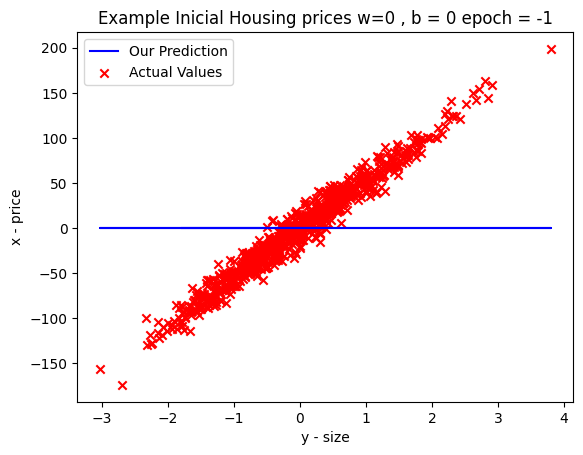

 Learning rate 0 ,  loss = 2977.92, w = 0, b = 0
 Learning rate 1 ,  loss = 2428.47, w = 5.378, b = -0.06999999999999999
 Learning rate 2 ,  loss = 1984.05, w = 10.215, b = -0.128
 Learning rate 3 ,  loss = 1624.61, w = 14.565000000000001, b = -0.175
 Learning rate 4 ,  loss = 1333.9, w = 18.477, b = -0.213
 Learning rate 5 ,  loss = 1098.79, w = 21.995, b = -0.243
 Learning rate 6 ,  loss = 908.62, w = 25.159000000000002, b = -0.266
 Learning rate 7 ,  loss = 754.79, w = 28.005000000000003, b = -0.28400000000000003
 Learning rate 8 ,  loss = 630.39, w = 30.564000000000004, b = -0.29700000000000004
 Learning rate 9 ,  loss = 529.75, w = 32.86600000000001, b = -0.30600000000000005
 Learning rate 10 ,  loss = 448.36, w = 34.93600000000001, b = -0.31200000000000006
 Learning rate 11 ,  loss = 382.52, w = 36.79800000000001, b = -0.31500000000000006
 Learning rate 12 ,  loss = 329.28, w = 38.47200000000001, b = -0.31600000000000006
 Learning rate 13 ,  loss = 286.21, w = 39.97800000000001, 

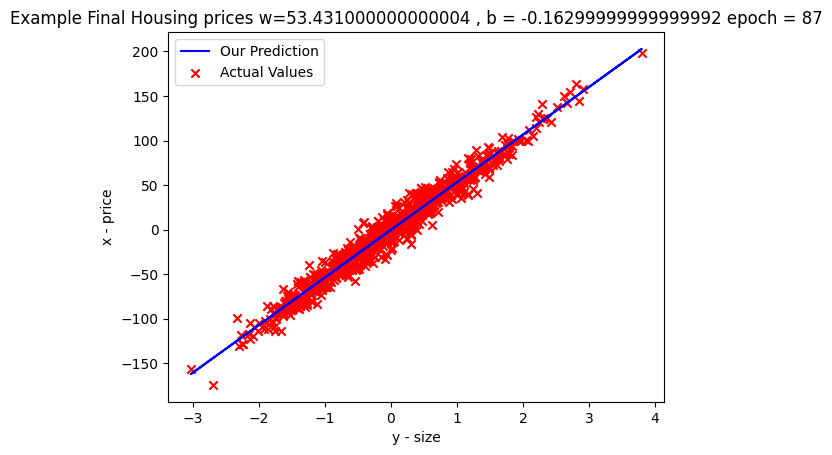

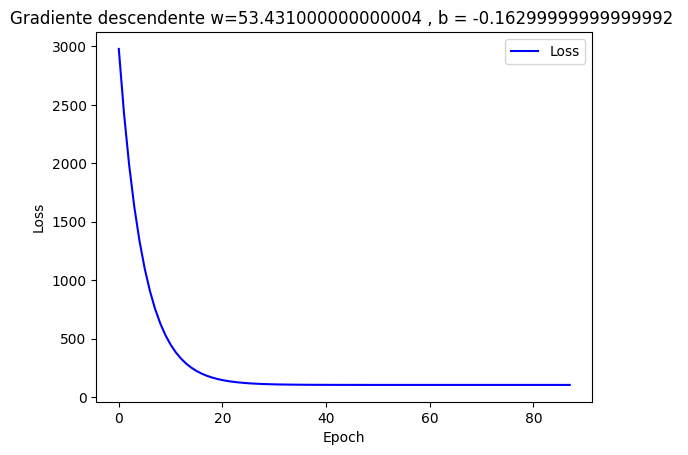

In [41]:
w =0 
b =0 
#Necesita probar los datoc on este alpha 0.001 , 0.01  , 0.1 , 1 ,
# Medir el tiempo
alpha = 0.1
mse_valores = []
cont = 0
y_predict = compute_model_output(x_train, w, b)
graficaExperimente(x_train, y_train, y_predict , w, b , "Inicial" , -1)
loss_almacen = []
i = 0

#Agregar 
#https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

#Graficar w , b y la funcio de costo e una grafica 3d
while True:
# while True:
    loss = MSE(y_train, y_predict)
    loss_almacen.append(round(loss,4))
    # graficaExperimente(x_train, y_train, tmp_f_wb , w, b , i)
    print(f" Learning rate {i} ,  loss = {loss}, w = {w}, b = {b}")
    d_w ,d_b = derivada_parcial_b_w(w, b, y_train, x_train)
    w_temp,b_temp =generate_gradiente(w, b,  alpha , d_w , d_b)
    if w_temp - w <= 0.000001:
        break
    w = w_temp
    b = b_temp
    y_predict = compute_model_output(x_train, w, b)
    i += 1

graficaExperimente(x_train, y_train, y_predict , w, b , "Final" , i)
graficaGradiente(loss_almacen , w, b )

